### 4주차 1일 고유값

In [4]:
# 연습문제 3.3.5
D = np.array([[2, 1], [1, 2]])
w4, V4 = np.linalg.eig(D)
print("w4 = ", w4)
print("V4 = ", V4)
    
E = np.array([[2, 3], [2, 1]])
w5, V5 = np.linalg.eig(E)
print("w5 = ", w5)
print("V5 = ", V5)

F = np.array([[1, 1], [0, 1]])
w6, V6 = np.linalg.eig(F)
print("w6 = ", w6)
print("V6 = ", V6)

w4 =  [3. 1.]
V4 =  [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
w5 =  [ 4. -1.]
V5 =  [[ 0.83205029 -0.70710678]
 [ 0.5547002   0.70710678]]
w6 =  [1. 1.]
V6 =  [[ 1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  2.22044605e-16]]


In [5]:
# 행렬의 대각화
B = np.array([[2, 3], [2, 1]])
w2, V2 = np.linalg.eig(B)
V2_inv = np.linalg.inv(V2)

V2 @ np.diag(w2) @ V2_inv

array([[2., 3.],
       [2., 1.]])

In [7]:
# 연습문제 3.3.6
A = np.array([[2, 3], [2, 1]])
w1, V1 = np.linalg.eig(A)
V1_inv = np.linalg.inv(V1)

V1 @ np.diag(w1) @ V1_inv

array([[2., 3.],
       [2., 1.]])

In [12]:
# 대칭행렬의 고유분해
# 행렬 A가 대칭행렬이면 고유값이 실수이고 고유벡터는 서로 직교한다.
A = np.array([[60, 30, 20], [30, 20, 15], [20, 15, 12]])
w, V = np.linalg.eig(A)
print("w = ", w)
print("V = ", V)

w =  [84.49913563  7.33962395  0.16124042]
V =  [[ 0.82704493  0.54744843  0.12765933]
 [ 0.4598639  -0.52829024 -0.71374689]
 [ 0.32329844 -0.64900666  0.68867153]]


In [17]:
w1, w2, w3 = w
v1 = V[:, 0:1]
v2 = V[:, 1:2]
v3 = V[:, 2:3]

In [19]:
A1 = v1 @ v1.T
A2 = v2 @ v2.T
A3 = v3 @ v3.T

In [20]:
w1 * A1 + w2 * A2 + w3 * A3

array([[60., 30., 20.],
       [30., 20., 15.],
       [20., 15., 12.]])

In [3]:
# 특이분해
B = np.array([[3, 2, 2], [2, 3, -2]])
U1, S1, V1T = np.linalg.svd(B, full_matrices=False)
print("U1 = ", U1)
print("S1 = ", S1)
print("V1T = ", V1T)

U1 =  [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
S1 =  [5. 3.]
V1T =  [[ 7.07106781e-01  7.07106781e-01  3.67439059e-16]
 [-2.35702260e-01  2.35702260e-01 -9.42809042e-01]]


In [4]:
U1 @ np.diag(S1) @ V1T

array([[ 3.,  2.,  2.],
       [ 2.,  3., -2.]])

### 4주차 2일 이미지PCA 

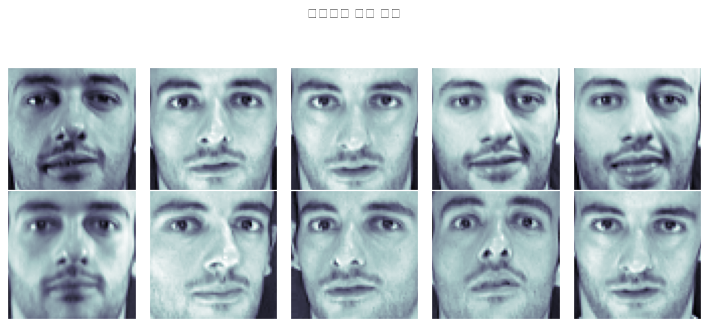

In [11]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()
K = 15  # 20번 인물의 사진만 선택
faces = faces_all.images[faces_all.target == K]

N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("올리베티 얼굴 사진")
plt.tight_layout()
plt.show()

In [12]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components=2)
X3 = faces_all.data[faces_all.target == K]
W3 = pca3.fit_transform(X3)
X32 = pca3.inverse_transform(W3)

C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py

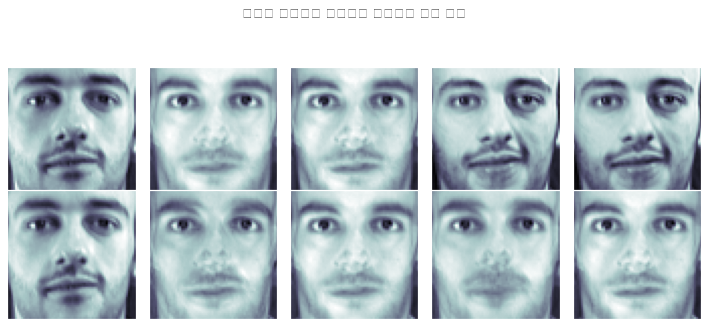

In [13]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(X32[k].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("주성분 분석으로 근사화한 올리베티 얼굴 사진")
plt.tight_layout()
plt.show()

C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0, flags=flags)


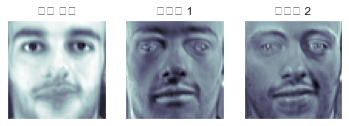

In [14]:
face_mean = pca3.mean_.reshape(64, 64)
face_p1 = pca3.components_[0].reshape(64, 64)
face_p2 = pca3.components_[1].reshape(64, 64)

plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("평균 얼굴")
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 1")
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 2")
plt.show()


C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py

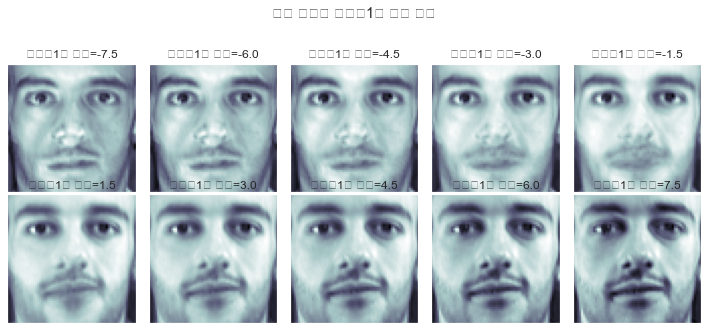

In [15]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p1, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분1의 비중={}".format(w))
plt.suptitle("평균 얼굴에 주성분1을 더한 사진")
plt.tight_layout()
plt.show()

### 주식 가격의 PCA

C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JeongEun Yeon\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py

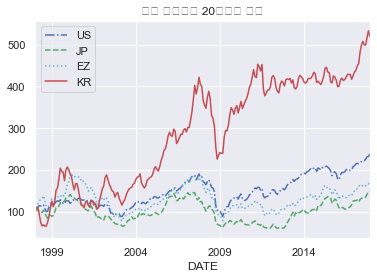

In [17]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime

symbols = [
    "SPASTT01USM661N", # US: 미국
    "SPASTT01JPM661N", # JP: 일본
    "SPASTT01EZM661N", # EZ: 유럽
    "SPASTT01KRM661N", # KR: 한국
]

data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred', 
                               start=datetime.datetime(1998, 1, 1),
                               end=datetime.datetime(2017, 12, 31))[sym]
data.columns = ["US", "JP", "EZ", "KR"]
data = data / data.iloc[0] * 100

styles = ["b-.", "g--", "c:", "r-"]
data.plot(style=styles)
plt.title("세계 주요국의 20년간의 주가")
plt.show()

In [19]:
df = ((data.pct_change() + 1).resample("A").prod() - 1).T * 100
print(df.iloc[:, :5])

DATE  1998-12-31  1999-12-31  2000-12-31  2001-12-31  2002-12-31
US     14.249290   10.800392    1.094171   -9.638213  -17.680773
JP     -8.567915   47.802619  -18.365577  -23.827406  -16.923968
EZ     21.308040   36.872314    1.375330  -21.857080  -30.647772
KR     10.411582   87.623876  -46.975114   27.644005    4.448180


In [22]:
pca2 = PCA(n_components=1)
w = pca2.fit_transform(df)
m = pca2.mean_
p1 = pca2.components_[0]
print(m)
print(p1)

[  9.35024903  45.7748003  -15.71779759  -6.91967355 -15.20108361
  17.48765584  10.95568389  32.60609686  11.08048721   9.94632162
 -44.28095456  27.19782058   8.32897696 -12.63319273  11.86532327
  23.41445161   5.34108071   3.42888451   2.14468408  17.2613721 ]
[-0.00270658  0.53651512 -0.39468113  0.41148841  0.23991661 -0.0315062
 -0.02577946  0.27841406 -0.07254126  0.28104992  0.03493189  0.23635416
  0.15424312  0.05797757 -0.0706337  -0.2543979  -0.09127243 -0.01132363
 -0.00264183  0.06046709]


In [23]:
print(w)

[[-33.4137842 ]
 [-20.94319729]
 [-26.91770195]
 [ 81.27468344]]
